In [29]:
from skimage import io
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage import util
import numpy as np


In [30]:
image_rgb = io.imread('99046aab-a2ae-420f-b837-dec74c8c0636.jpeg')
image_gray = rgb2gray(image_rgb)
image_gray_float32 = util.img_as_float32(image_gray)


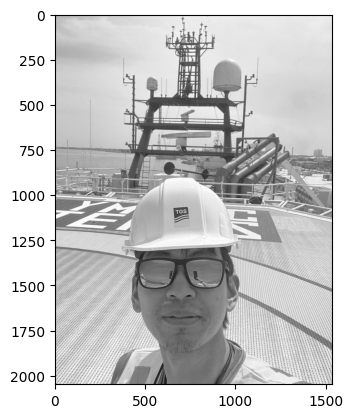

In [31]:
plt.imshow(image_gray_float32,cmap=plt.cm.gray)

Filtering

In [ ]:
def apply_nxn_filter(image, kernel, stride, padding=True):
    k = kernel.shape[0]

    if padding:
        pad = k // 2
        image_padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')
    else:
        image_padded = image

    out_h = (image_padded.shape[0] - k) // stride + 1
    out_w = (image_padded.shape[1] - k) // stride + 1
    output = np.zeros((out_h, out_w))

    # Convolution
    for i in range(0, out_h):
        for j in range(0, out_w):
            region = image_padded[i*stride:i*stride+k, j*stride:j*stride+k]
            output[i, j] = np.sum(region * kernel)

    return output

In [35]:
# kernel
f1 = np.array([[1,  2,  1],
                    [0,  0,  0],
                    [-1, -2, -1]])


f2 = np.array([[0, 0, 0],
                    [0, 2, 0],
                    [0, 0, 0]]) - 1/9 * np.ones((3,3))


f3 = 1/16 * np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]])

newimage_1 = apply_nxn_filter(image_gray_float32, kernel=f1, stride=2, padding=True)
newimage_2 = apply_nxn_filter(image_gray_float32, kernel=f2, stride=2, padding=True)
newimage_3 = apply_nxn_filter(image_gray_float32, kernel=f3, stride=1, padding=True)


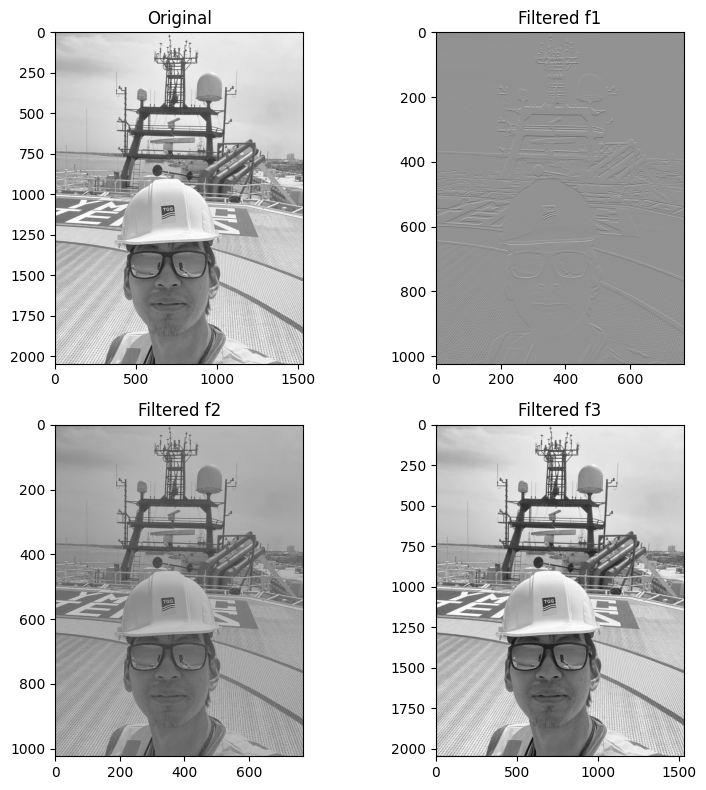

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_gray_float32, cmap=plt.cm.gray)
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(newimage_1, cmap=plt.cm.gray)
plt.title("Filtered f1")

plt.subplot(2, 2, 3)
plt.imshow(newimage_2, cmap=plt.cm.gray)
plt.title("Filtered f2")

plt.subplot(2, 2, 4)
plt.imshow(newimage_3, cmap=plt.cm.gray)
plt.title("Filtered f3")

plt.tight_layout()
plt.show()


Filter f1 and filter f2 reduce the size of the original image because I used stride = 2.


f1: Sobel filter: in this casae, the filter detects horizontal edges.

f2: High-pass filter: removes smooth background, keeps fine details.

f3: Gaussian blur: smooths the image, reduces noise and detail.